# SymPy examples

sources:
http://docs.sympy.org/latest/tutorial/
http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/notebooks/SymPy%20Examples.ipynb

In [1]:
from __future__ import division
import sympy as sym
# make things look pretty in the notebook
from sympy.interactive import printing
printing.init_printing()

import math

### basic symbolic manipulation

In [3]:
print(math.sqrt(2))

1.4142135623730951


In [4]:
print(sym.sqrt(2))

sqrt(2)


In [5]:
print(sym.sqrt(8))

2*sqrt(2)


In [6]:
from sympy import symbols
x, y, z = sym.symbols("x y z")

In [7]:
expr = x + 2*y
expr

In [8]:
expr - 1

In [9]:
expr - y

In [10]:
f = x*expr
f

In [11]:
g = sym.expand(f)
g

In [12]:
sym.factor(g)

### Using SymPy interactively

In [13]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6 (Python 3.4.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


### substitution

In [14]:
expr = sin(x*2*pi)
expr

In [15]:
expr.subs(x,1)

In [16]:
a = expr.subs(x,0.125)
a

In [17]:
type(a)

sympy.core.mul.Mul

In [19]:
b = a.evalf()
print(b, type(b))

0.707106781186548 <class 'sympy.core.numbers.Float'>


In [20]:
pi.evalf(100)

In [21]:
c = float(b)
print(c, type(c))

0.7071067811865476 <class 'float'>


### Python and SymPy

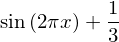

In [22]:
f = expr + Rational(1,3)
f

In [23]:
expr + 1/3

### equality

In [24]:
x + 1 == 4

False

In [25]:
Eq(x + 1, 4)

In [26]:
a = (x + 1)**2
b = x**2 + 2*x + 1    # these are algebraically equal

In [27]:
a == b

False

In [28]:
simplify(a - b)   # this will test equality algebraically

In [29]:
a = cos(x) + I*sin(x)
a

In [30]:
simplify(a)

### More substitution

In [31]:
expr = cos(x)
expr.subs(x, 0)

In [32]:
expr

In [33]:
x

In [34]:
expr = x**3 + 4*x*y - z
expr

In [35]:
expr.subs([(x, 2), (y, 4), (z, 0)])

### simplifying

In [36]:
simplify(sin(x)**2 + cos(x)**2)

In [37]:
simplify( (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1) )

In [38]:
simplify(gamma(x)/gamma(x - 2))

In [39]:
simplify(x**2 + 2*x + 1)

In [40]:
factor(x**2 + 2*x + 1)

### polynomial simplification

In [41]:
expand((x + 1)**2)

In [42]:
expand((x + 2)*(x - 3))

In [43]:
expand( (x + 1)*(x - 2) - (x - 1)*x)

In [44]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [45]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

In [46]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [48]:
collected_expr = collect(expr, x)
collected_expr

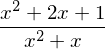

In [49]:
a = (x**2 + 2*x + 1)/(x**2 + x)
a

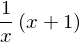

In [50]:
cancel(a)

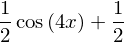

In [51]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [52]:
trigsimp(sin(x)*tan(x)/sec(x))

### Calculus

In [53]:
diff(cos(x), x)

In [54]:
diff(exp(x**2), x)

In [55]:
diff(x**4, x, 3)

In [56]:
expr = exp(x*y*z)
diff(expr, x, y, z)

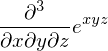

In [57]:
deriv = Derivative(expr, x, y, z)
deriv

In [58]:
deriv.doit()

In [59]:
integrate(cos(x), x)

In [60]:
integrate(exp(-x), (x, 0, oo))

In [61]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

Integral(x**x, x)


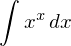

In [63]:
expr = integrate(x**x, x)
print(expr)
expr

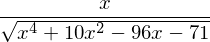

In [64]:
a = x / sqrt(x**4 + 10*x**2 - 96*x - 71)   # example from Wikipedia Risch algorithm page)
a

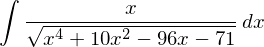

In [65]:
integrate(a, x)     # this has a known solution, but SymPy fails to find it

In [66]:
limit(sin(x)/x, x, 0)

In [67]:
expr = exp(sin(x))
a = expr.series(x, 0, 10)    # expansion about x=0 up to 6th order

In [68]:
print(a)

1 + x + x**2/2 - x**4/8 - x**5/15 - x**6/240 + x**7/90 + 31*x**8/5760 + x**9/5670 + O(x**10)


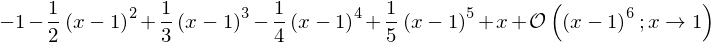

In [69]:
c = log(x).series(x, x0=1, n=6)
c

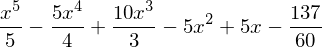

In [70]:
simplify(c.removeO())

### solvers

In [71]:
solve(Eq(x**2, 1), x)

In [72]:
solve(x**2 - 1, x)

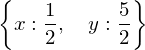

In [73]:
solve([x - y + 2, x + y - 3], [x, y])

In [74]:
roots(x**3 - 6*x**2 + 9*x, x)

In [75]:
f, g = symbols('f g', cls=Function)

In [76]:
f(x)

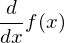

In [77]:
f(x).diff(x)

In [78]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

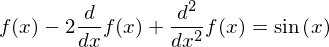

In [79]:
diffeq

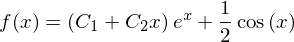

In [80]:
dsolve(diffeq, f(x))

### Matrices

consider the Euler equations:

$$q_t + A(q) q_x = 0$$

where

$$q = \left ( \begin{array}{c} \rho \\ u \\ p \end{array} \right )
\qquad
A(q) = \left ( \begin{array}{ccc} u  & \rho     & 0 \\                          
                                  0  &  u       & 1/\rho \\                     
                                  0  & c^2 \rho & u \end{array} \right ) $$



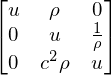

In [81]:
from sympy.abc import rho
rho, u, c = symbols('rho u c')
A = Matrix([[u, rho, 0], [0, u, rho**-1], [0, c**2 * rho, u]])
A

In [82]:
A.eigenvals()

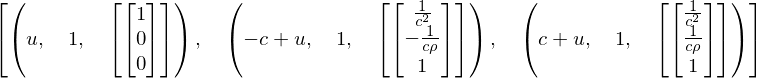

In [83]:
A.eigenvects()

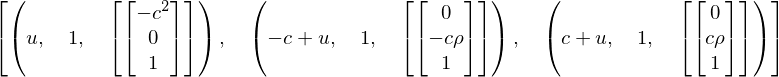

In [84]:
A.T.eigenvects()

### Units

In [86]:
import sympy.physics.units as u

M = 20*u.kilogram
g = 9.81 * u.m / u.s**2
W = M*g
print(W, W/ (1*u.N))

196.2*kg*m/s**2 196.200000000000


In [87]:
print(u.find_unit('force'))

['force']


In [88]:
print(u.find_unit(u.force))

['N', 'force', 'pound', 'newton', 'pounds', 'newtons']


In [90]:
mph = u.miles/u.hours
print(mph)
print(mph.n(4))
print((u.c/mph).n(5))
# or
cmph = u.c/mph
cmph.evalf()

1397*m/(3125*s)
0.447*m/s
6.7062e+8


In [91]:
erg = u.g*u.cm**2/u.s**2

In [92]:
L = 4.e33*erg
(L/u.joule).evalf()

### Vectors